In [1]:
%reload_ext autoreload
%autoreload 2

In [5]:
import logging
import numpy as np
import pandas as pd
import json

from tqdm import tqdm
from bs4 import BeautifulSoup
from utils import *

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

tqdm.pandas(desc="Preprocess dataset")
%matplotlib inline

In [4]:
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)
logger = logging.getLogger()

# Load Dataset

In [6]:
data = json.load(open("data/data.json", "r"))

In [7]:
data[0]

'why scalability matters for your app Building an app is an extensive process. From a fresh idea to a marketable product, the journey is filled with ups and downs. So, when you (hopefully) build that successful app, the last thing you want is for it to hit a dead end.\nHowever, that’s, unfortunately, the way it usually goes. You might think that accelerated growth is totally positive, as users are downloading your app at a record rate. But, an app that isn’t designed and developed to seamlessly handle this explosive growth will eventually end up being a failure.\nConsider this: is your app, as it stands today, able to scale up to exponential growth? If you have any doubts, you need to seriously consider this scalability issue.\n\nWhat is app scalability?\nScalability is the ability of your app to handle a growing number of customers, clients and/or users. It also pertains to the ability of your current or future developer to maintain the app. Consider the possibility that your app isn’

# Preprocess for training

In [8]:
regex = get_regex_expression()
regex

'(https?:\\/\\/.*[\\r\\n])|(\\#[^\\s]*)|(\\@[^\\s]*)|(author)|(\\S*@\\S+)|([^a-zA-Z0-9À-ÿ\\u00f1\\u00d1\\s])'

In [9]:
example = preprocess_data(data[0], regex, 
                          removing_stops=True, lemmatize=True)
print(example)

['scalability', 'matter', 'app', 'build', 'app', 'extensive', 'process', 'fresh', 'idea', 'marketable', 'product', 'journey', 'fill', 'up', 'down', 'hopefully', 'build', 'successful', 'app', 'thing', 'want', 'hit', 'dead', 'end', 'unfortunately', 'way', 'usually', 'go', 'think', 'accelerate', 'growth', 'totally', 'positive', 'user', 'download', 'app', 'record', 'rate', 'app', 'isn', 'design', 'develop', 'seamlessly', 'handle', 'explosive', 'growth', 'eventually', 'end', 'failure', 'consider', 'app', 'stand', 'today', 'able', 'scale', 'exponential', 'growth', 'doubt', 'need', 'seriously', 'consider', 'scalability', 'issue', 'app', 'scalability', 'scalability', 'ability', 'app', 'handle', 'grow', 'number', 'customer', 'client', 'user', 'pertain', 'ability', 'current', 'future', 'developer', 'maintain', 'app', 'consider', 'possibility', 'app', 'isn', 'currently', 'scalable', 'prepared', 'scramble', 'add', 'necessary', 'additional', 'feature', 'flexible', 'coding', 'keep', 'app', 'run', 's

In [10]:
# Train data doing lemmatization and removing stopswords
train_data = [preprocess_data(normalize_data, regex, True, True) 
                for normalize_data in tqdm(data)]

100%|██████████| 485/485 [00:55<00:00,  8.81it/s]


In [11]:
print(train_data[0])

['scalability', 'matter', 'app', 'build', 'app', 'extensive', 'process', 'fresh', 'idea', 'marketable', 'product', 'journey', 'fill', 'up', 'down', 'hopefully', 'build', 'successful', 'app', 'thing', 'want', 'hit', 'dead', 'end', 'unfortunately', 'way', 'usually', 'go', 'think', 'accelerate', 'growth', 'totally', 'positive', 'user', 'download', 'app', 'record', 'rate', 'app', 'isn', 'design', 'develop', 'seamlessly', 'handle', 'explosive', 'growth', 'eventually', 'end', 'failure', 'consider', 'app', 'stand', 'today', 'able', 'scale', 'exponential', 'growth', 'doubt', 'need', 'seriously', 'consider', 'scalability', 'issue', 'app', 'scalability', 'scalability', 'ability', 'app', 'handle', 'grow', 'number', 'customer', 'client', 'user', 'pertain', 'ability', 'current', 'future', 'developer', 'maintain', 'app', 'consider', 'possibility', 'app', 'isn', 'currently', 'scalable', 'prepared', 'scramble', 'add', 'necessary', 'additional', 'feature', 'flexible', 'coding', 'keep', 'app', 'run', 's

# Get bigrams

In [12]:
from gensim.models import Phrases

In [13]:
bigrams = Phrases(train_data, min_count=1, threshold=5)

2020-07-31 18:37:34,544 : INFO : collecting all words and their counts
2020-07-31 18:37:34,545 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-31 18:37:34,877 : INFO : collected 167215 word types from a corpus of 238684 words (unigram + bigrams) and 485 sentences
2020-07-31 18:37:34,877 : INFO : using 167215 counts as vocab in Phrases<0 vocab, min_count=1, threshold=5, max_vocab_size=40000000>


# Tfidf

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition

In [15]:
train_data = [' '.join(text_vector) for text_vector in tqdm(bigrams[train_data])]
tfidf = TfidfVectorizer(tokenizer=lambda text: text.split())

100%|██████████| 485/485 [00:00<00:00, 826.06it/s]


In [16]:
tfidf.fit(train_data)
TFIDF_MATRIX = tfidf.transform(train_data)
TFIDF_MATRIX.shape

(485, 21648)

In [17]:
vocab = np.array(tfidf.get_feature_names())
vocab[120:140]

array(['aboard', 'abound', 'abraham', 'abreast', 'abroad', 'abrupt',
       'abruptly', 'absence', 'absolute', 'absolute_good', 'absolute_key',
       'absolute_necessity', 'absolutely', 'absolutely_critical',
       'absolutely_essential', 'absolutely_necessary', 'absorb',
       'abstract', 'abstract_idea', 'abundance'], dtype='<U32')

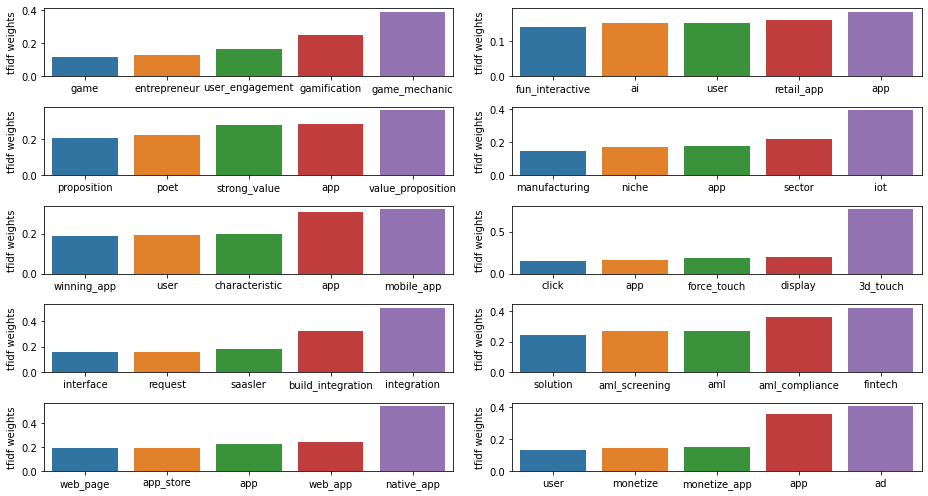

In [22]:
%matplotlib inline
visualize_tfidf_weights(TFIDF_MATRIX.toarray(), vocab, top_n=5, total=10, width=13, 
                        height=7, div=2)

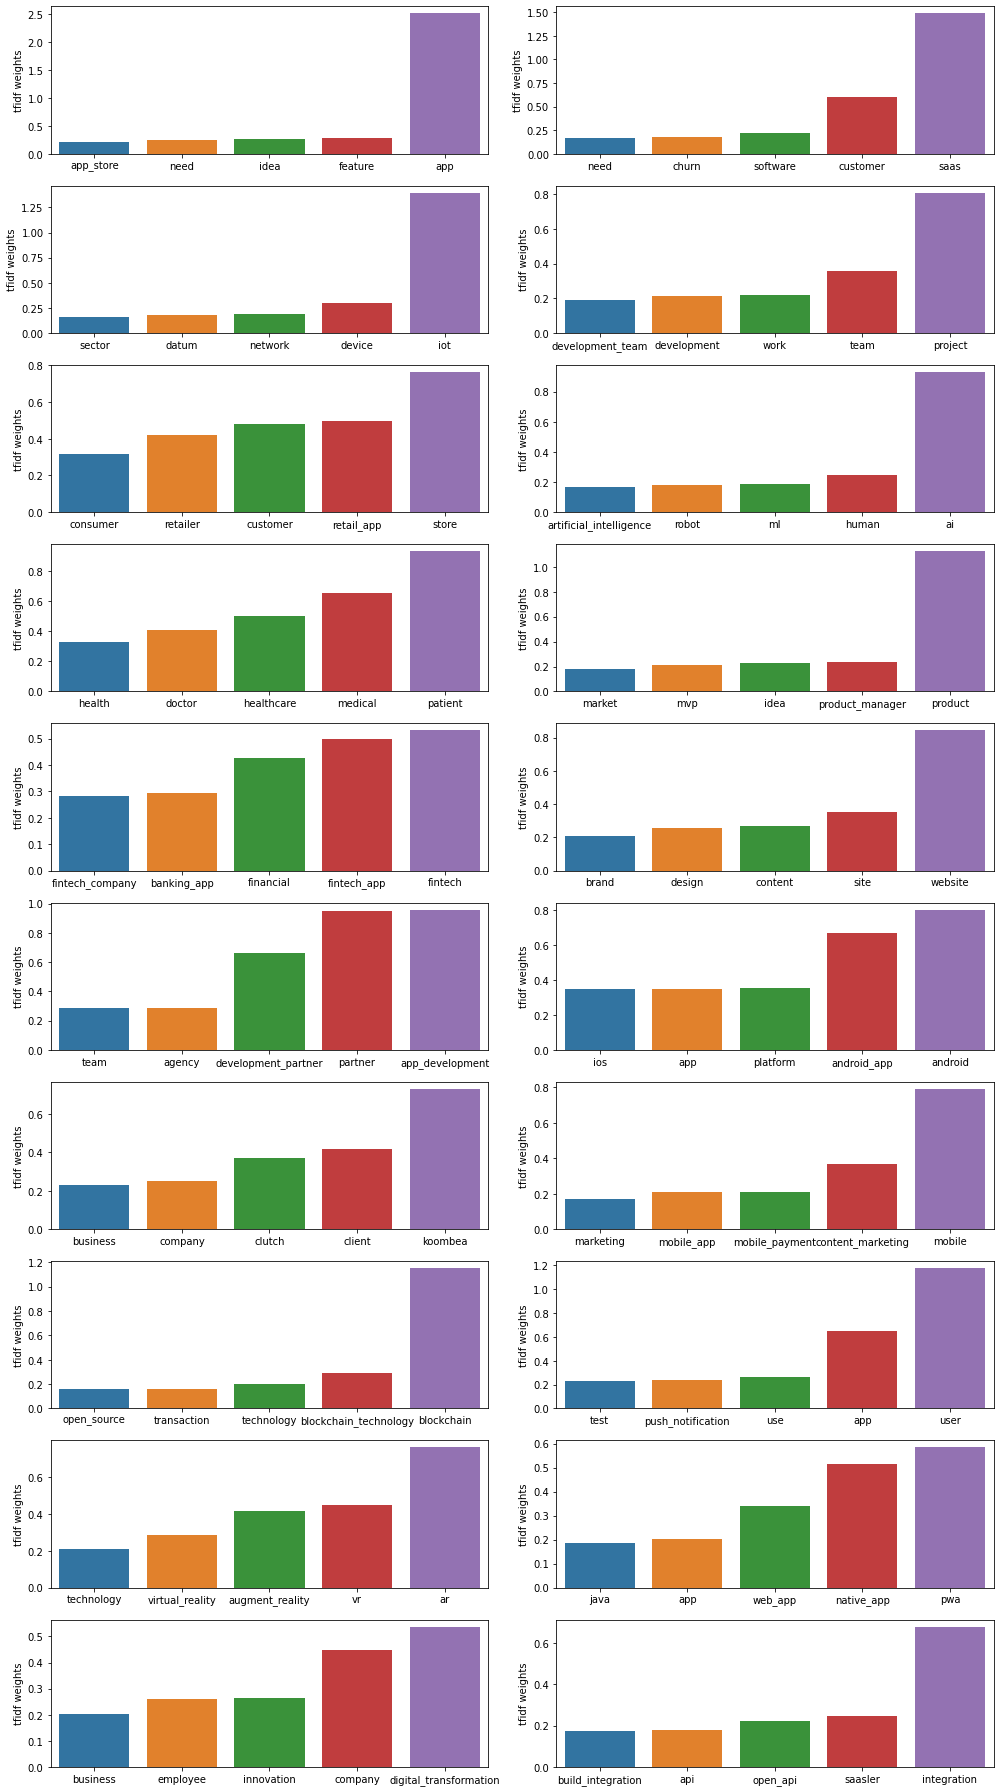

In [23]:
%matplotlib inline
m, n = TFIDF_MATRIX.shape
d = 20 # Number of topics, this is just a gess
NMF_model = decomposition.NMF(n_components=d)
NMF_model.fit(TFIDF_MATRIX)
U = NMF_model.transform(TFIDF_MATRIX)
V = NMF_model.components_

visualize_tfidf_topics_weights(V, vocab, top_n=5, width=14, height=25, 
                               div=2)

In [24]:
import pickle
pickle.dump(TFIDF_MATRIX, open("model_storage/tfidf_bigrams.pickle", "wb"))
pickle.dump(vocab, open("model_storage/vocab_bigrams.pickle", "wb"))